In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import plotting

#plotly 
import plotly.offline as py
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.express as px

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix,classification_report,precision_score, plot_roc_curve, plot_precision_recall_curve, balanced_accuracy_score
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.formula.api as smf
sns.set(style="whitegrid")

plt.style.use('fivethirtyeight')

In [3]:
df=pd.read_csv('/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv')

In [4]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
df.shape

(4238, 16)

# Check the distribution of the missing values

<AxesSubplot:xlabel='education', ylabel='Density'>

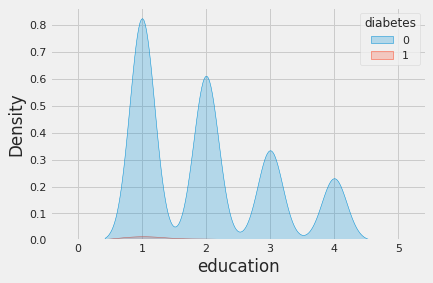

In [7]:
sns.kdeplot(df['education'], fill=True, hue=df['diabetes'])

<AxesSubplot:xlabel='cigsPerDay', ylabel='Density'>

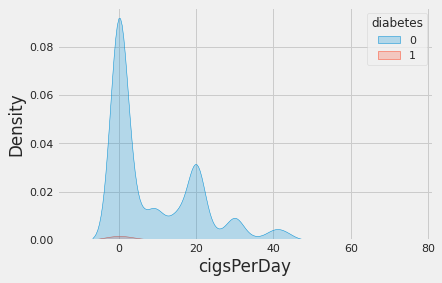

In [8]:
sns.kdeplot(df['cigsPerDay'], fill=True, hue=df['diabetes'])

<AxesSubplot:xlabel='BPMeds', ylabel='Density'>

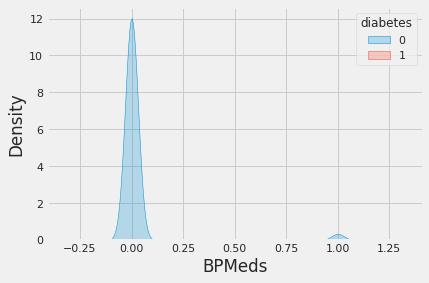

In [9]:
sns.kdeplot(df['BPMeds'], fill=True, hue=df['diabetes'])

<AxesSubplot:xlabel='totChol', ylabel='Density'>

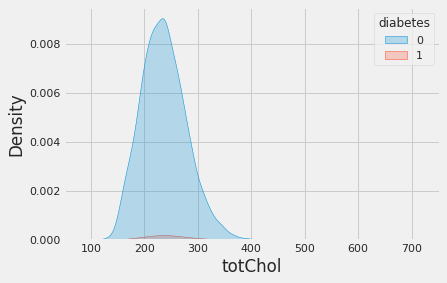

In [10]:
sns.kdeplot(df['totChol'], fill=True, hue=df['diabetes'])

<AxesSubplot:xlabel='BMI', ylabel='Density'>

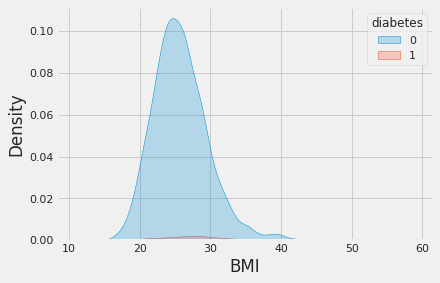

In [11]:
sns.kdeplot(df['BMI'], fill=True, hue=df['diabetes'])

<AxesSubplot:xlabel='glucose', ylabel='Density'>

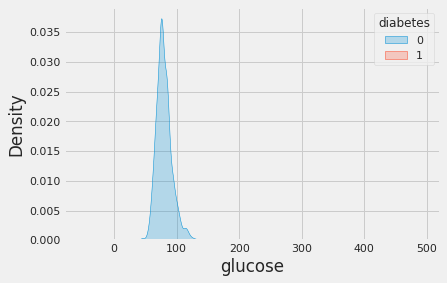

In [12]:
sns.kdeplot(df['glucose'], fill=True, hue=df['diabetes'])

In [13]:
df['education'].value_counts()

1.0    1720
2.0    1253
3.0     687
4.0     473
Name: education, dtype: int64

In [14]:
df['cigsPerDay'].value_counts()

0.0     2144
20.0     734
30.0     217
15.0     210
10.0     143
9.0      130
5.0      121
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
2.0       18
6.0       18
7.0       12
8.0       11
60.0      11
4.0        9
18.0       8
17.0       7
50.0       6
23.0       6
11.0       5
45.0       3
13.0       3
12.0       3
16.0       3
14.0       2
19.0       2
38.0       1
29.0       1
70.0       1
Name: cigsPerDay, dtype: int64

In [15]:
df['BPMeds'].value_counts()

0.0    4061
1.0     124
Name: BPMeds, dtype: int64

In [16]:
df['totChol'].value_counts()

240.0    85
220.0    70
260.0    62
210.0    61
232.0    59
         ..
392.0     1
405.0     1
359.0     1
398.0     1
119.0     1
Name: totChol, Length: 248, dtype: int64

In [17]:
df['BMI'].value_counts()

22.19    18
22.54    18
23.48    18
22.91    18
23.09    16
         ..
34.13     1
23.21     1
29.13     1
19.87     1
43.67     1
Name: BMI, Length: 1363, dtype: int64

In [18]:
df['glucose'].value_counts()

75.0     193
77.0     167
73.0     156
80.0     152
70.0     152
        ... 
386.0      1
155.0      1
147.0      1
205.0      1
260.0      1
Name: glucose, Length: 143, dtype: int64

In [19]:
df['heartRate'].value_counts()

75.0     563
80.0     385
70.0     305
60.0     231
85.0     227
        ... 
47.0       1
130.0      1
140.0      1
51.0       1
46.0       1
Name: heartRate, Length: 73, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


# Response variable

In [21]:
df['diabetes'].value_counts()

0    4129
1     109
Name: diabetes, dtype: int64

# Filling the missing values

In [22]:
df['education'].fillna(1.0, inplace=True)

In [23]:
df['cigsPerDay'].fillna(0, inplace=True)

In [24]:
df['BPMeds'].fillna(0, inplace=True)

In [25]:
df['totChol'].fillna(240.0, inplace=True)

In [26]:
df['BMI'].fillna(df['BMI'].mean(), inplace=True)

In [27]:
df['glucose'].fillna(df['glucose'].mean(), inplace=True)
df['heartRate'].fillna(df['heartRate'].mean(), inplace=True)

In [28]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Correlation Matrix

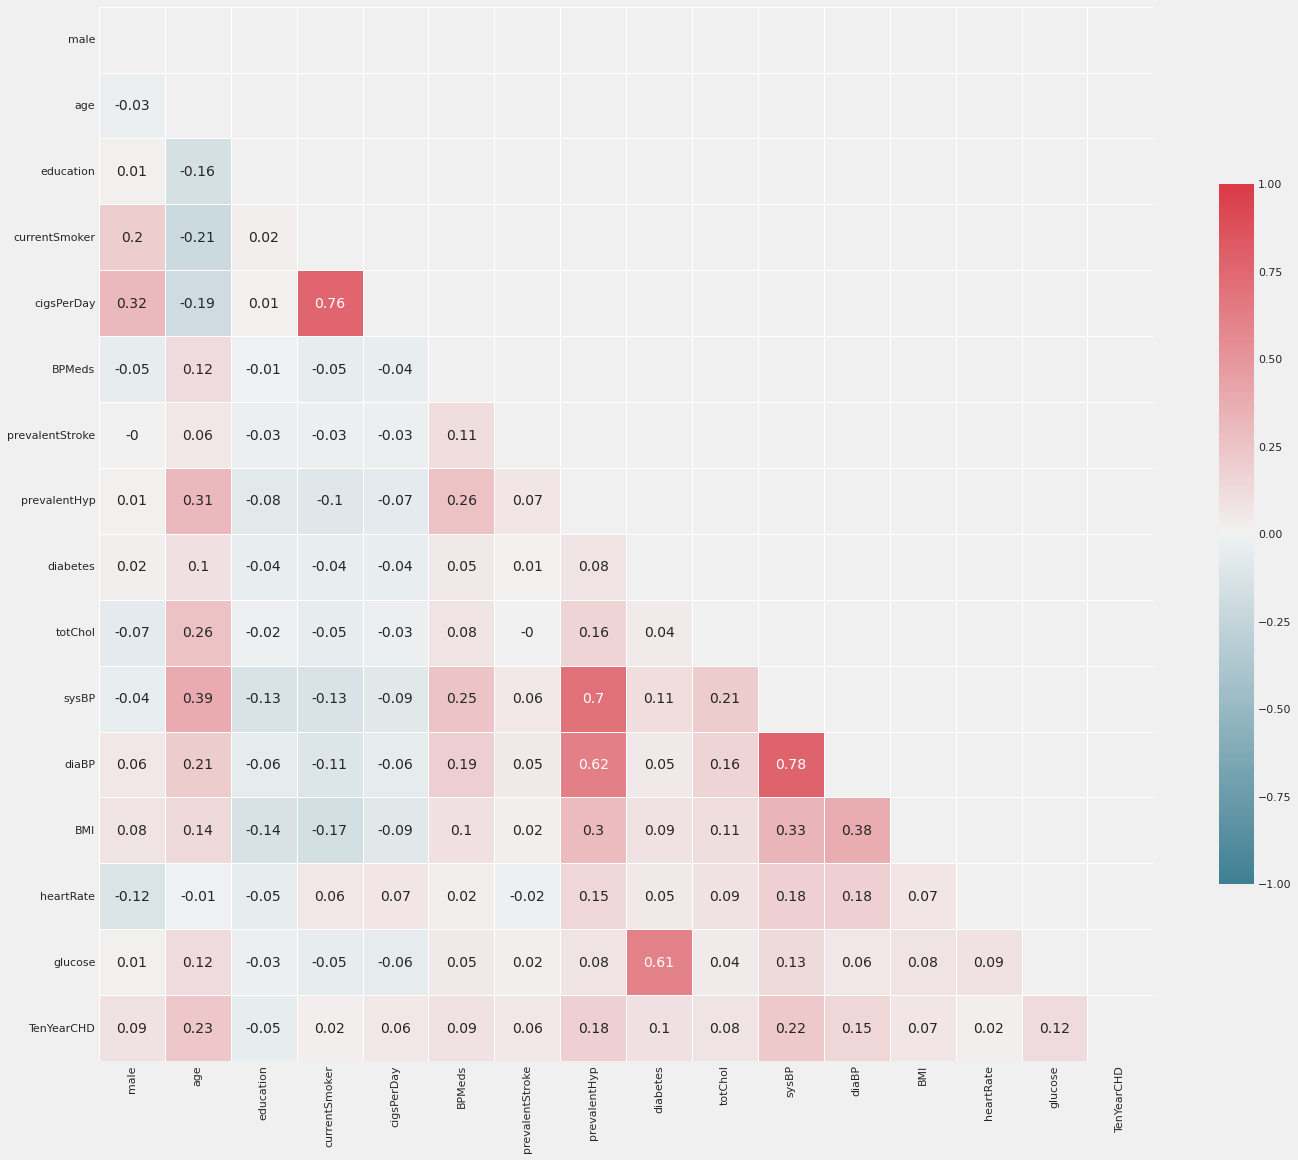

In [29]:
corr = df.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

In [30]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

# Multicollinearity¶


In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
cols=['diabetes']
X=df.drop(cols, axis=1)

In [32]:
X.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [33]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

            feature         VIF
0              male    2.095334
1               age   41.237531
2         education    4.560051
3     currentSmoker    4.730240
4        cigsPerDay    4.038058
5            BPMeds    1.131412
6   prevalentStroke    1.026409
7      prevalentHyp    2.377110
8           totChol   31.464459
9             sysBP  138.148571
10            diaBP  135.213861
11              BMI   45.104726
12        heartRate   38.578428
13          glucose   14.161788
14       TenYearCHD    1.286445


# Logistic Regresion¶


In [34]:
x=df[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp','totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']]
y=df['diabetes']
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=10)

In [35]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

In [36]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [37]:
lr=LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [38]:
y_pred=lr.predict(X_train)

In [39]:
print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred))
print("F1 Score:-", metrics.f1_score(y_train, y_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred))
print("Log Loss:-", metrics.log_loss(y_train, y_pred))
print("Precision Score:-", metrics.precision_score(y_train, y_pred))
print("Recall Score:-", metrics.recall_score(y_train, y_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred))

Accuracy Score:- 0.9841537424140256
F1 Score:- 0.624
Average Precision Score:- 0.44586462800756843
Log Loss:- 0.5473114258093478
Precision Score:- 0.9069767441860465
Recall Score:- 0.47560975609756095
ROC-AUC Score:- 0.7371113967727749


In [40]:

y_test_pred=lr.predict(X_test)

In [41]:
lr_acc=metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy Score:-",lr_acc)
print("F1 Score:-", metrics.f1_score(y_test, y_test_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_test, y_test_pred))
print("Log Loss:-", metrics.log_loss(y_test, y_test_pred))
print("Precision Score:-", metrics.precision_score(y_test, y_test_pred))
print("Recall Score:-", metrics.recall_score(y_test, y_test_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_test, y_test_pred))

Accuracy Score:- 0.9889937106918238
F1 Score:- 0.6818181818181819
Average Precision Score:- 0.4996300406955235
Log Loss:- 0.3801450225814553
Precision Score:- 0.8823529411764706
Recall Score:- 0.5555555555555556
ROC-AUC Score:- 0.7769745649263722


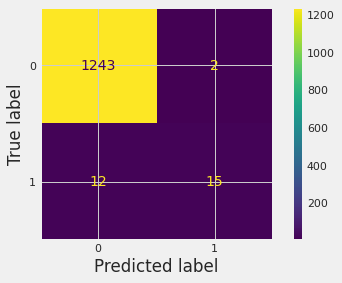

In [42]:
cfm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=lr.classes_)
disp.plot() 

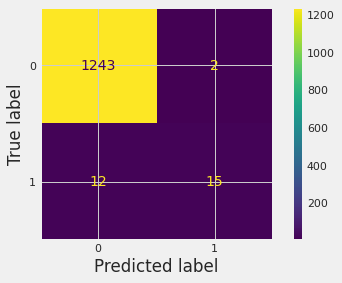

In [43]:
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=lr.classes_)
disp.plot() 

In [44]:
y_test_pred_prob=lr.predict_proba(X_test)[:,1]
y_test_pred_prob

from sklearn.metrics import roc_curve

In [45]:
metrics.roc_auc_score(y_test, y_test_pred_prob)

0.833050721404135

In [46]:
metrics.roc_auc_score(y_test, y_test_pred_prob)

0.833050721404135

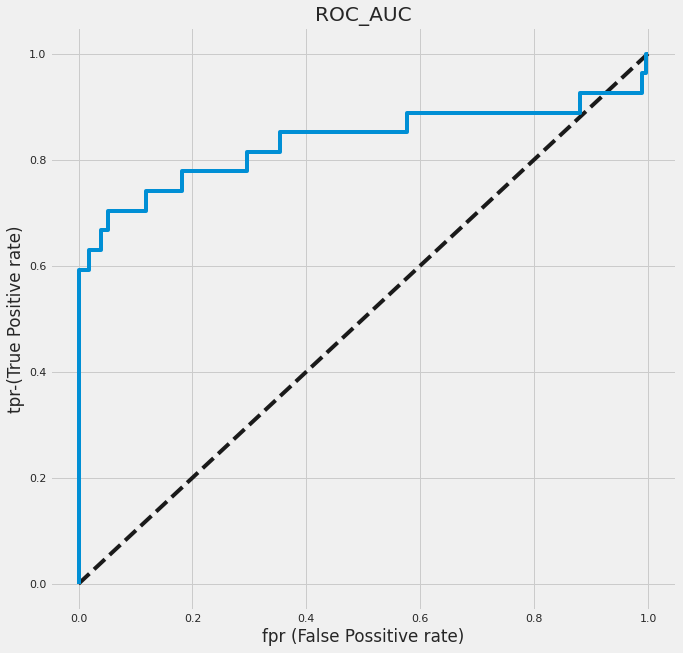

In [47]:
fpr, tpr,thresholds=roc_curve(y_test,y_test_pred_prob)
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel("fpr (False Possitive rate)")
plt.ylabel("tpr-(True Positive rate)")
plt.title("ROC_AUC")
plt.show()

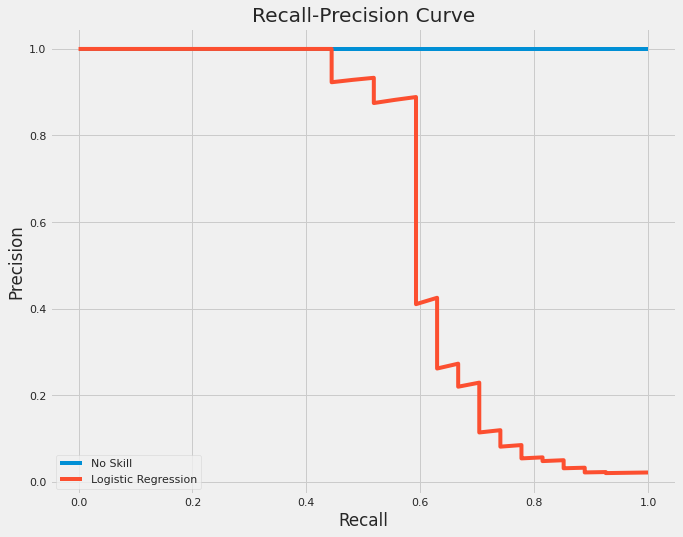

In [48]:
from sklearn.metrics import precision_recall_curve
no_skill=len(y==1)/len(y)
y_test_prob=lr.predict_proba(X_test)[:,1]
plt.figure(figsize=(10,8))
plt.plot([0,1],[no_skill, no_skill], label="No Skill")
precision, recall,_ =precision_recall_curve(y_test, y_test_prob)
plt.plot(recall, precision, marker='',label="Logistic Regression")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall-Precision Curve")
plt.legend()
plt.show()

# Threshold

In [49]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [50]:
threshold = []
accuracy = []

for p in np.unique(model.predict_proba(X_train)[:,1]):
    threshold.append(p)
    y_pred = (model.predict_proba(X_train)[:,1] >= p).astype(int)
    accuracy.append(balanced_accuracy_score(y_train,y_pred))

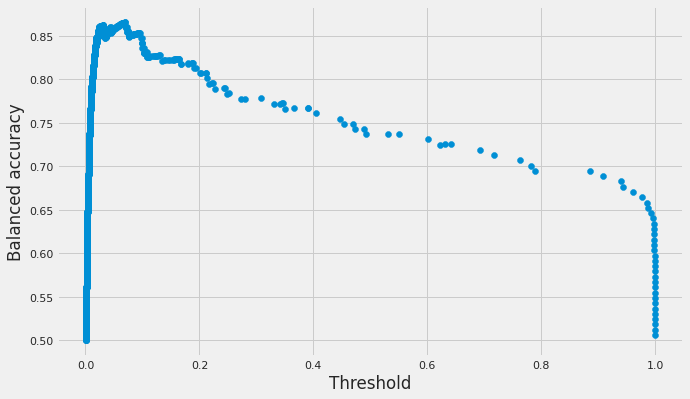

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(threshold,accuracy)
plt.xlabel("Threshold")
plt.ylabel("Balanced accuracy")
plt.show()

# Other Models

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report,precision_score, plot_roc_curve, plot_precision_recall_curve, balanced_accuracy_score

def clf_scores(clf, y_predicted):
    # Accuracy
    acc_train = clf.score(X_train, y_train)*100
    acc_test = clf.score(X_test, y_test)*100
    
    roc = roc_auc_score(y_test, y_predicted)*100 
    tn, fp, fn, tp = confusion_matrix(y_test, y_predicted).ravel()
    cm = confusion_matrix(y_test, y_predicted)
    correct = tp + tn
    incorrect = fp + fn
    d=[acc_train, acc_test,  roc, correct, incorrect,  cm]
    index=["acc_train",'Test Accuracy',"Roc Score","COrrect","Incorrect","Confusion"  ]
    output=pd.DataFrame(data=d, index=index)
    
    d=sns.heatmap(cm, annot=True)
    dd=plot_roc_curve(clf, X_train, y_train)
    ddd=plot_precision_recall_curve(clf, X_train, y_train)

    return output,d, dd, ddd

(                                   0
acc_train                  98.415374
Test Accuracy              98.899371
Roc Score                  77.697456
COrrect                         1258
Incorrect                         14
Confusion      [[1243, 2], [12, 15]], <AxesSubplot:>, <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f8bffeb0610>, <sklearn.metrics._plot.precision_recall_curve.PrecisionRecallDisplay object at 0x7f8bffde3690>)


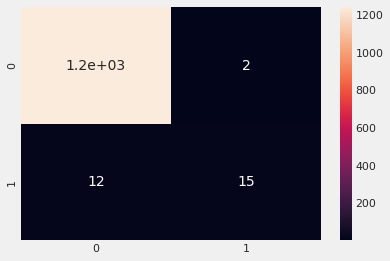

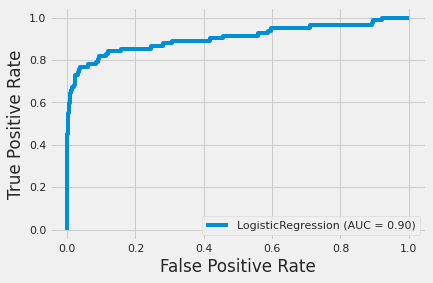

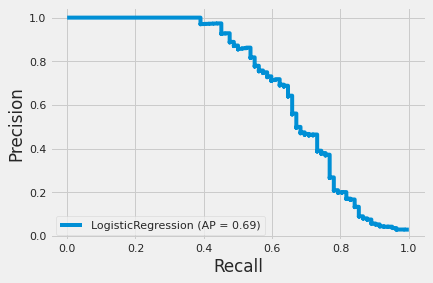

In [53]:
#1. Logistic regression

from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(solver='liblinear')
clf_lr.fit(X_train, y_train)

Y_pred_lr = clf_lr.predict(X_test)
print(clf_scores(clf_lr, Y_pred_lr))

(                                   0
acc_train                      100.0
Test Accuracy              98.899371
Roc Score                  77.697456
COrrect                         1258
Incorrect                         14
Confusion      [[1243, 2], [12, 15]], <AxesSubplot:>, <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f8bfff0f810>, <sklearn.metrics._plot.precision_recall_curve.PrecisionRecallDisplay object at 0x7f8bffae6ed0>)


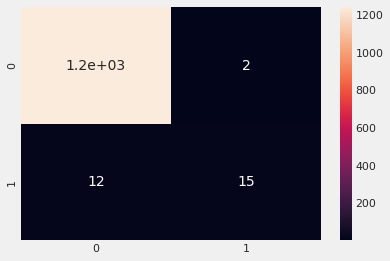

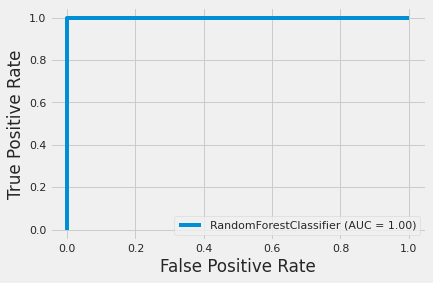

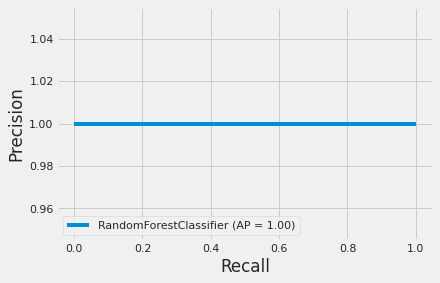

In [54]:
# 2 Random Forest

from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

Y_pred_rf = clf_rf.predict(X_test)
print(clf_scores(clf_rf, Y_pred_rf))

(                                    0
acc_train                   99.527984
Test Accuracy               98.034591
Roc Score                   75.443998
COrrect                          1247
Incorrect                          25
Confusion      [[1233, 12], [13, 14]], <AxesSubplot:>, <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f8bfcf43350>, <sklearn.metrics._plot.precision_recall_curve.PrecisionRecallDisplay object at 0x7f8bfce52610>)


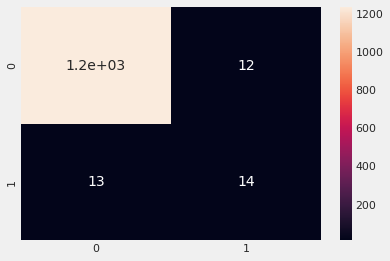

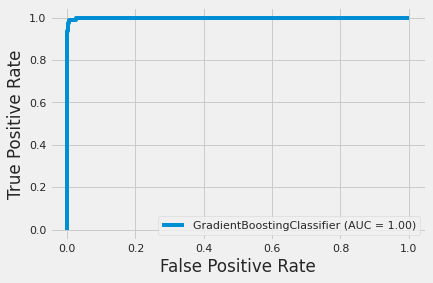

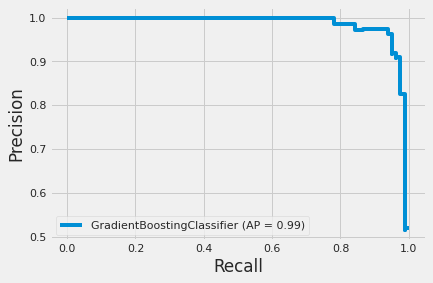

In [55]:
# 3 XGboost
from sklearn.ensemble import GradientBoostingClassifier
clf_xg = GradientBoostingClassifier()
clf_xg.fit(X_train, y_train)

Y_pred_xg = clf_xg.predict(X_test)
print(clf_scores(clf_xg, Y_pred_xg))

# Fine-tune Random Forest

# Grid Search
In this grid search I will try different combinations of RF hyperparameters.

Most important hyperparameters of Random Forest:

* n_estimators = n of trees
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* min_samples_split = min number of data points placed in a node before the node is split
* min_samples_leaf = min number of data points allowed in a leaf node
* bootstrap = method for sampling data points (with or without replacement)

In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(clf_rf, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 50, None], 'max_features': [5, 10],
                          'n_estimators': [10, 25]}],
             scoring='neg_mean_squared_error')

In [57]:
#now let's how the RMSE changes for each parameter configuration
cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.1298330826739832 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 10}
0.12453845996248714 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 25}
0.1272043776013769 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 10}
0.128529875981925 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 25}
0.12586943967109668 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 10}
0.12452932589375487 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 25}
0.12588299466778008 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 10}
0.12452932589375487 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 25}
0.12720884867842797 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 10}
0.12453389301186447 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 25}
0.12453389301186447 {'bootstrap': Tr

In [58]:
#find the best model of grid search
grid_search_forest.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=10, max_features=5,
                       n_estimators=25)

In [59]:
# Performance metrics
grid_best= grid_search_forest.best_estimator_.predict(X_train)
errors = abs(grid_best - y_train)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_train))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from grid-search has an accuracy of', round(accuracy, 2),'%')

The best model from grid-search has an accuracy of 90.24 %


(                                   0
acc_train                  99.730276
Test Accuracy              98.820755
Roc Score                  77.657296
COrrect                         1257
Incorrect                         15
Confusion      [[1242, 3], [12, 15]], <AxesSubplot:>, <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f8bfcdbe750>, <sklearn.metrics._plot.precision_recall_curve.PrecisionRecallDisplay object at 0x7f8bfcc53ed0>)


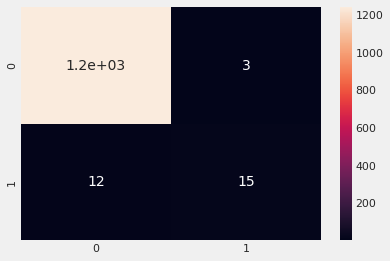

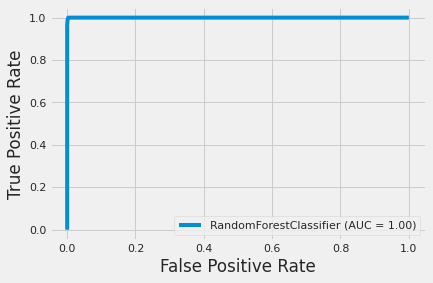

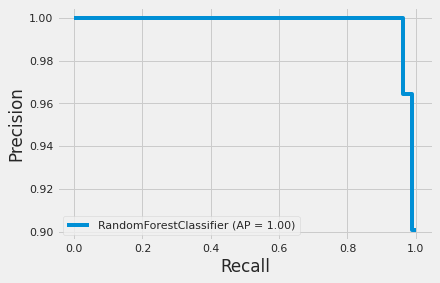

In [60]:
# Tuned Random Forest

from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=50, max_features=5, n_estimators=10)
clf_rf.fit(X_train, y_train)

Y_pred_rf = clf_rf.predict(X_test)
print(clf_scores(clf_rf, Y_pred_rf))